In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads (1).csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['Purchased'] = le.fit_transform(df['Purchased'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df = df.drop('User ID',axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [ ]:
x = df.iloc[:,:3]
y = df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain= scaler.transform(xtrain)
xtest= scaler.transform(xtest)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Step 3 | Predection**

In [ ]:
ypred = lr.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=ytest, y_pred=ypred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[44  6]
 [ 7 23]]


In [ ]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(ytest, lr.predict(xtest))))

Precision: 0.7931034482758621


In [ ]:
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(ytest, lr.predict(xtest)), 2))

Recall: 0.77


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, lr.predict(xtest)))

0.8375


f1 score: 0.7796610169491527
Auroc score: 0.8233333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


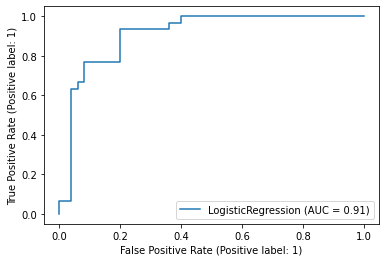

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score,f1_score
print('f1 score:',f1_score(ytest,ypred))
print('Auroc score:',roc_auc_score(ytest,ypred))
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label=2)
plot_roc_curve(lr, xtest, ytest)

**Visualization**

In [ ]:
lr.coef_

array([[0.13614695, 2.40051101, 1.13374853]])

In [ ]:
lr.intercept_

array([-1.13391989])

In [ ]:
def lr_model_purchased_predict(a):
    return 1 / (1 + np.exp(-(lr.intercept_ + lr.coef_ * a)))

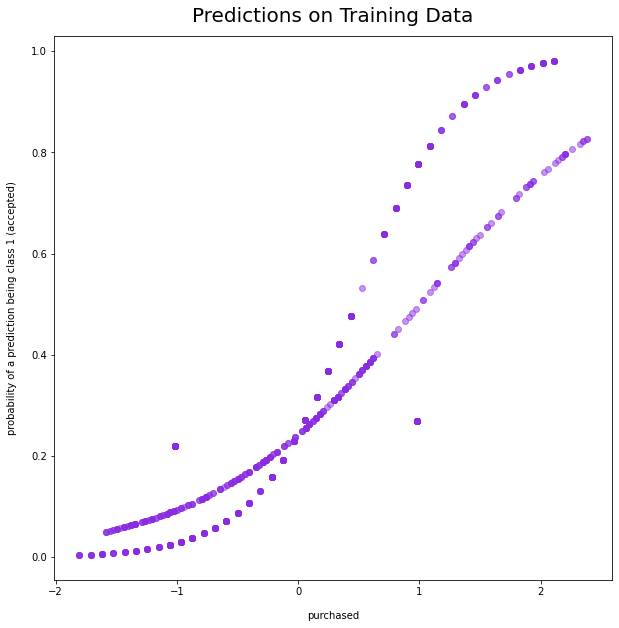

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x=xtrain, y=lr_model_purchased_predict(xtrain), c='blueviolet', alpha=0.5)
plt.title("Predictions on Training Data", y=1.015, fontsize=20)
plt.xlabel("purchased", labelpad=14)
plt.ylabel("probability of a prediction being class 1 (accepted)", labelpad=14);

because of multiple features we are getting many curves